<a href="https://colab.research.google.com/github/Cloud2602/BEVLidar-Object-Detection/blob/main/Risk_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Estimation from Multi Sensor Motion Data

### Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For v1.0 version of mini dataset
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_metadata_v1.0-mini.zip
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_sensordata_v1.0-mini.zip
!unzip "man-truckscenes_*.zip"

--2025-06-06 09:14:03--  https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_metadata_v1.0-mini.zip
Resolving man-truckscenes.s3.eu-central-1.amazonaws.com (man-truckscenes.s3.eu-central-1.amazonaws.com)... 3.5.135.208, 52.219.170.42, 3.5.138.165, ...
Connecting to man-truckscenes.s3.eu-central-1.amazonaws.com (man-truckscenes.s3.eu-central-1.amazonaws.com)|3.5.135.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11308850 (11M) [application/zip]
Saving to: ‘man-truckscenes_metadata_v1.0-mini.zip’

man-truckscenes_met 100%[===================>]  10.78M  7.57MB/s    in 1.4s    

2025-06-06 09:14:05 (7.57 MB/s) - ‘man-truckscenes_metadata_v1.0-mini.zip’ saved [11308850/11308850]

--2025-06-06 09:14:05--  https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_sensordata_v1.0-mini.zip
Resolving man-truckscenes.s3.eu-central-1.amazonaws.com (man-truckscenes.s3.eu-central-1.amazonaws.com)... 3.5.135.208, 5

In [ ]:
%%bash
mkdir -p /content/data
cd "/content/drive/MyDrive"
unzip -o "man-truckscenes_*.zip" -d "/content"

Archive:  man-truckscenes_sensordata_v1.0-mini.zip
   creating: /content/man-truckscenes/samples/
   creating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473372666841.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373166828.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373666803.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374166792.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374667278.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375166805.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375666769.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473376166718.jpg  
  inflating: /


2 archives were successfully processed.


Open github repository

In [ ]:
!git clone https://github.com/Cloud2602/BEVLidar-Object-Detection.git

Cloning into 'BEVLidar-Object-Detection'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 118 (delta 35), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (118/118), 36.12 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (35/35), done.


## Initialization

In [ ]:
!pip install truckscenes-devkit[all]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.3 MB/s eta 0:00:00
   ━━━━━

In [ ]:
%matplotlib inline
from truckscenes import TruckScenes

trucksc = TruckScenes('v1.0-mini', 'man-truckscenes', True)

Loading truckscenes tables for version v1.0-mini...
11 attribute,
18 calibrated_sensor,
27 category,
20090 ego_motion_cabin,
20089 ego_motion_chassis,
20116 ego_pose,
1094 instance,
400 sample,
25750 sample_annotation,
43556 sample_data,
10 scene,
18 sensor,
4 visibility,
Done loading in 1.184 seconds.
Reverse indexing ...
Done reverse indexing in 0.4 seconds.


# BEV + YOLO

## Analyze Data

In [ ]:
# Mostra i primi 5 sample_token validi
valid_samples = trucksc.sample
for i in range(5):
    print(f"[{i}] sample_token:", valid_samples[i]['token'])


[0] sample_token: 32d2bcf46e734dffb14fe2e0a823d059
[1] sample_token: deb7b3f332f042d49e7636d6e4959354
[2] sample_token: a574551be31547e4b7c78ff87c75abb3
[3] sample_token: 1393759bf6ff4f8e88deff0da0dc2aca
[4] sample_token: 368662645c194921b716c026347db664


In [ ]:
record = trucksc.get('sample', "32d2bcf46e734dffb14fe2e0a823d059")
print(record)

{'token': '32d2bcf46e734dffb14fe2e0a823d059', 'scene_token': '044c648ac12345f1aedf33c9f91cdc5a', 'timestamp': 1695473372698161, 'prev': '', 'next': 'deb7b3f332f042d49e7636d6e4959354', 'data': {'RADAR_RIGHT_BACK': 'c790efd2151d491aae635234a5df26d8', 'RADAR_RIGHT_SIDE': '7f3083ba7f2e49678b4ccbc2fd14f590', 'RADAR_RIGHT_FRONT': '36c9a2c6b3ee4d9f9d01c902521cbb27', 'RADAR_LEFT_FRONT': '1e6375db490e4563b55fce389b06a53b', 'RADAR_LEFT_SIDE': 'c58e24c2e644404f85a5c0901d367338', 'RADAR_LEFT_BACK': 'e940e3abeab34da8833e013c84b52366', 'LIDAR_LEFT': '9ae8f9fd6cd2458298c82eb6a85119a6', 'LIDAR_RIGHT': '28a12ab75263458a977dd29ca4e54ee2', 'LIDAR_TOP_FRONT': '1ac1e8bcd1ed4493a73c011dc2441713', 'LIDAR_TOP_LEFT': '85c18e7eeb3c42f194eba257dcf6d66c', 'LIDAR_TOP_RIGHT': '064d8efa5f31493db10f96dbeef91282', 'LIDAR_REAR': '18b4fe677dc7408b84ebd555c559da16', 'CAMERA_LEFT_FRONT': '7625b794c8a14e918dc23113ee5d10da', 'CAMERA_LEFT_BACK': 'c6e32737071942fb9d5bcd8c69a88181', 'CAMERA_RIGHT_FRONT': '4e11f21f05be46f3b219a

### Try to render BEV

<ipython-input-6-acae677eb106>:48: RuntimeWarning: overflow encountered in scalar add
  R_chan[xi, yi] += 1


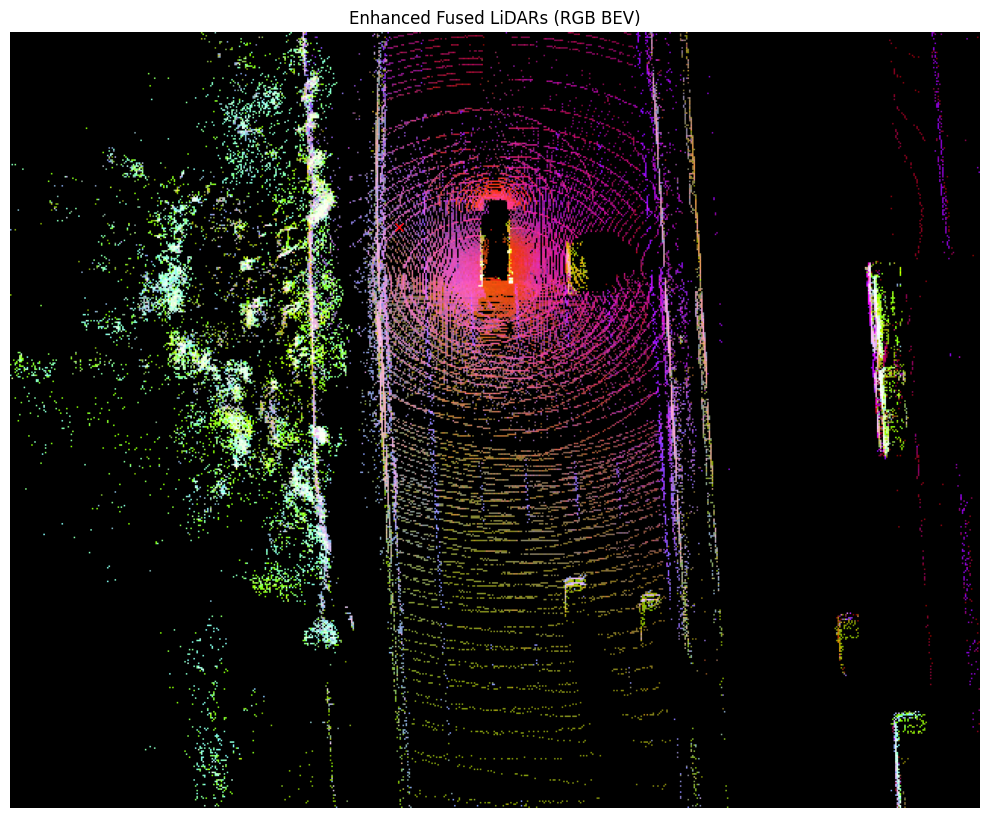

In [ ]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from truckscenes.utils.geometry_utils import transform_matrix
from pyquaternion import Quaternion
from truckscenes.utils.data_classes import LidarPointCloud


def bev_rgb_enhanced(points, intensities=None,
                     res=0.1,
                     side_range=(-40, 40), fwd_range=(-20, 60),
                     height_range=(-2, 2)):

    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    if intensities is None:
        intensities = np.ones_like(x)

    # Applica il filtro per inquadrare l'area desiderata
    mask = (
        (x > fwd_range[0]) & (x < fwd_range[1]) &
        (y > side_range[0]) & (y < side_range[1])
    )
    x, y, z, intensities = x[mask], y[mask], z[mask], intensities[mask]

    # Converti in coordinate immagine
    x_img = ((x - fwd_range[0]) / res).astype(np.int32)
    y_img = ((y - side_range[0]) / res).astype(np.int32)
    H = int((fwd_range[1] - fwd_range[0]) / res)
    W = int((side_range[1] - side_range[0]) / res)

    # Mappa z e intensità su [0, 255]
    z_scaled = ((np.clip(z, *height_range) - height_range[0]) /
                (height_range[1] - height_range[0]) * 255).astype(np.uint8)
    intensities_scaled = ((intensities - np.min(intensities)) /
                          (np.ptp(intensities) + 1e-8) * 255).astype(np.uint8)

    # Crea 3 canali: R = densità, G = altezza, B = intensità
    R_chan = np.zeros((H, W), dtype=np.uint8)
    G_chan = np.zeros((H, W), dtype=np.uint8)
    B_chan = np.zeros((H, W), dtype=np.uint8)

    for xi, yi, zi, ii in zip(x_img, y_img, z_scaled, intensities_scaled):
        if 0 <= xi < H and 0 <= yi < W:
            G_chan[xi, yi] = max(G_chan[xi, yi], zi)
            B_chan[xi, yi] = max(B_chan[xi, yi], ii)
            R_chan[xi, yi] += 1

    # Normalizza canale R
    if R_chan.max() > 0:
        R_chan = np.clip((R_chan / R_chan.max()) * 255, 0, 255).astype(np.uint8)

    # Equalizzazione (facoltativa ma migliora il contrasto)
    R_eq = cv2.equalizeHist(R_chan)
    G_eq = cv2.equalizeHist(G_chan)
    B_eq = cv2.equalizeHist(B_chan)

    bev = np.stack([R_eq, G_eq, B_eq], axis=-1)
    bev = cv2.resize(bev, (640, 512), interpolation=cv2.INTER_NEAREST)

    return bev


def render_lidar_fused_enhanced(trucksc, sample_token: str, nsweeps: int = 1,
                                res=0.1, side_range=(-40, 40), fwd_range=(-20, 60),
                                height_range=(-3, 2),
                                figsize=(10, 10)):

    record = trucksc.get('sample', sample_token)

    # Trova tutti i token dei sensori lidar
    lidar_tokens = [
        token for channel, token in record['data'].items()
        if trucksc.get('sample_data', token)['sensor_modality'] == 'lidar'
    ]

    all_points = []

    for token in lidar_tokens:
        sd = trucksc.get('sample_data', token)
        sample = trucksc.get('sample', sd['sample_token'])
        chan = sd['channel']
        ref_chan = 'LIDAR_LEFT'
        ref_token = sample['data'][ref_chan]
        ref_sd = trucksc.get('sample_data', ref_token)

        pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample, chan, ref_chan, nsweeps=nsweeps)
        points = pc.points[:3, :]
        intensity = pc.points[3, :]

        # === Trasformazione in flat ego frame ===
        cs_record = trucksc.get('calibrated_sensor', ref_sd['calibrated_sensor_token'])
        pose_record = trucksc.get('ego_pose', ref_sd['ego_pose_token'])

        ref_to_ego = transform_matrix(cs_record['translation'], Quaternion(cs_record['rotation']))
        ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
        rotation_flat = np.dot(
            Quaternion(scalar=np.cos(ego_yaw / 2),
                       vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
            Quaternion(pose_record['rotation']).inverse.rotation_matrix
        )
        vehicle_flat = np.eye(4)
        vehicle_flat[:3, :3] = rotation_flat
        viewpoint = np.dot(vehicle_flat, ref_to_ego)

        points_h = np.vstack((points, np.ones(points.shape[1])))
        transformed = (viewpoint @ points_h).T[:, :3]

        all_points.append(np.hstack((transformed, intensity.reshape(-1, 1))))

    fused_points = np.vstack(all_points)

    # === Crea immagine BEV ===
    bev_img = bev_rgb_enhanced(fused_points[:, :3], fused_points[:, 3],
                               res=res,
                               side_range=side_range,
                               fwd_range=fwd_range,
                               height_range=height_range)

    # === Mostra immagine ===
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(bev_img)
    ax.axis('off')
    ax.set_title("Enhanced Fused LiDARs (RGB BEV)")

    # Centro veicolo (x=0, y=0)
    center_x = int((0 - fwd_range[0]) / res * 512 / ((fwd_range[1] - fwd_range[0]) / res))
    center_y = int((0 - side_range[0]) / res * 512 / ((side_range[1] - side_range[0]) / res))
    ax.plot(center_y, center_x, 'rx')

    plt.tight_layout()
    plt.show()


render_lidar_fused_enhanced(trucksc, "34d0b00f1801498c803ec07dce543b72")


## Dataset Creation

### Immages

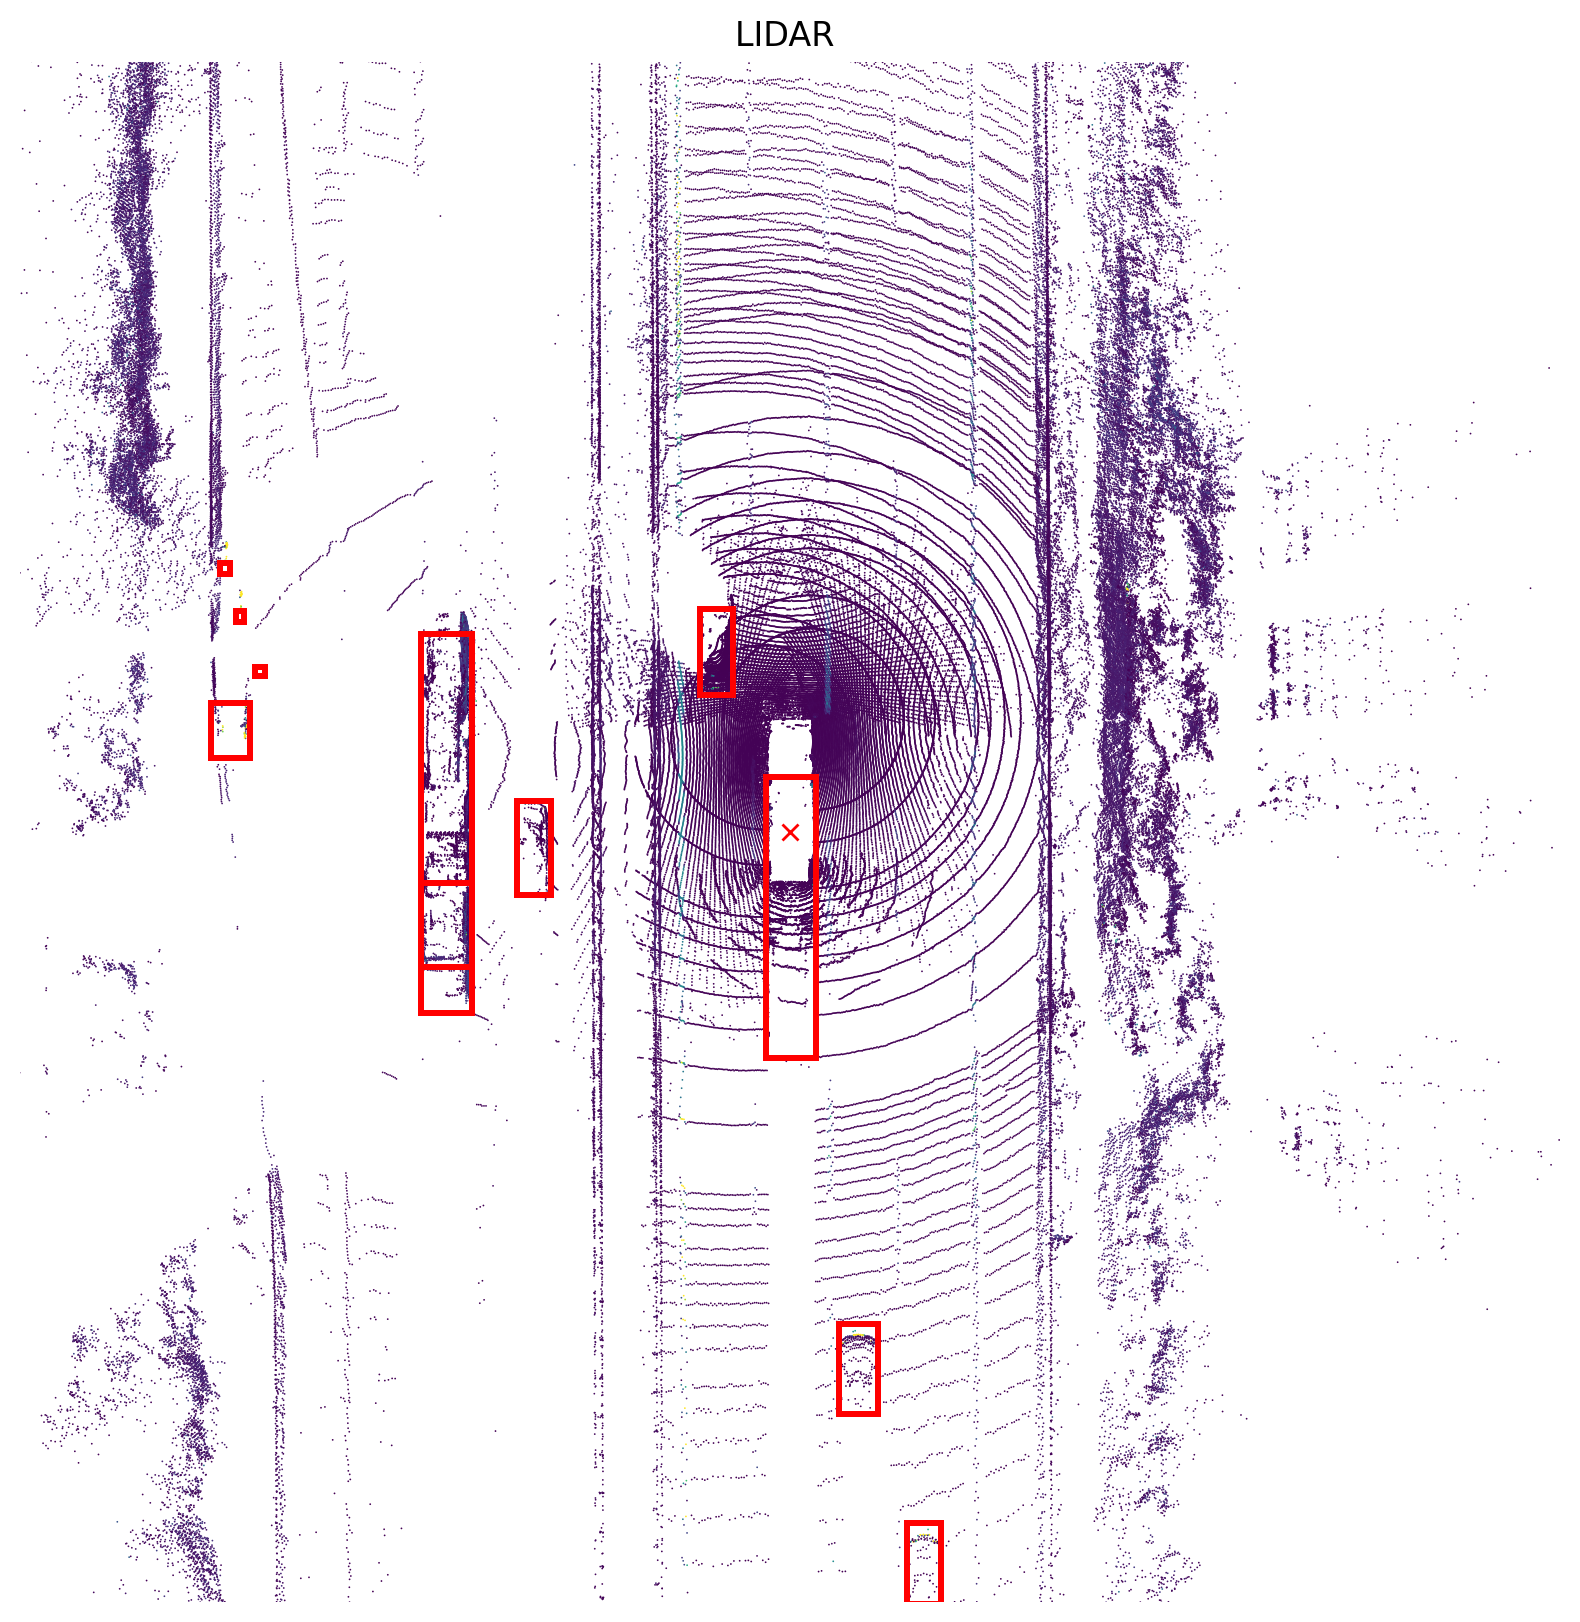

<Figure size 640x480 with 0 Axes>

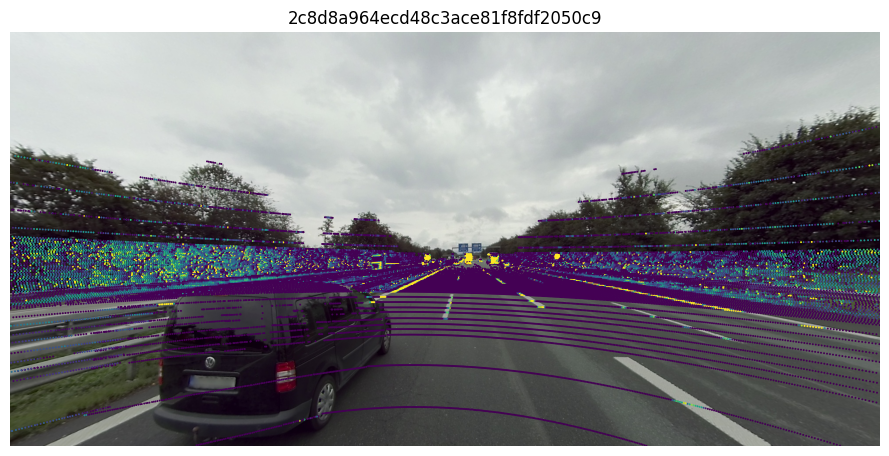

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize, Colormap
from matplotlib import cm
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from typing import List, Tuple, Union
import matplotlib.patches as patches

# TruckScenes utils
from truckscenes.utils.geometry_utils import transform_matrix, view_points, BoxVisibility
from truckscenes.utils.data_classes import LidarPointCloud



def _render_pc_sample_data(trucksc,
                               sensor_modality: str,
                               sample_data_token: str,
                               with_anns: bool = True,
                               selected_anntokens: List[str] = None,
                               box_vis_level: BoxVisibility = BoxVisibility.ANY,
                               axes_limit: Union[List[float], Tuple[float], float] = 40,
                               ax: Axes = None,
                               nsweeps: int = 1,
                               use_flat_vehicle_coordinates: bool = True,
                               point_scale: float = 1.0,
                               cmap: str = 'viridis',
                               cnorm: bool = True) -> None:

        intensities = []
        points = []

        for sd_token in sample_data_token:
            sd_record = trucksc.get('sample_data', sd_token)

            sample_rec = trucksc.get('sample', sd_record['sample_token'])
            chan = sd_record['channel']
            ref_chan = 'LIDAR_LEFT'
            ref_sd_token = sample_rec['data'][ref_chan]
            ref_sd_record = trucksc.get('sample_data', ref_sd_token)

            if sensor_modality == 'lidar':
                # Get aggregated lidar point cloud in lidar frame.
                pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)
                velocities = None
                intensity = pc.points[3, :]
            else:
                # Get aggregated radar point cloud in reference frame.
                # The point cloud is transformed to the reference frame
                # for visualization purposes.
                pc, _ = RadarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)

                # Transform radar velocities (x is front, y is left),
                # as these are not transformed when loading the
                # point cloud.
                radar_cs_record = trucksc.get('calibrated_sensor',
                                                   sd_record['calibrated_sensor_token'])
                ref_cs_record = trucksc.get('calibrated_sensor',
                                                 ref_sd_record['calibrated_sensor_token'])
                velocities = pc.points[3:5, :]
                velocities = np.vstack((velocities, np.zeros(pc.points.shape[1])))
                velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix,
                                    velocities)
                velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T,
                                    velocities)
                velocities[2, :] = np.zeros(pc.points.shape[1])
                intensity = pc.points[6, :]

            # By default we render the sample_data top down in the sensor frame.
            # This is slightly inaccurate when rendering the map as the sensor frame may
            # not be perfectly upright.
            if use_flat_vehicle_coordinates:
                # Retrieve transformation matrices for reference point cloud.
                cs_record = trucksc.get('calibrated_sensor',
                                             ref_sd_record['calibrated_sensor_token'])
                pose_record = trucksc.get('ego_pose',
                                               ref_sd_record['ego_pose_token'])
                ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                              rotation=Quaternion(cs_record["rotation"]))

                # Compute rotation between 3D vehicle pose and "flat" vehicle pose
                # (parallel to global z plane).
                ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
                rotation_vehicle_flat_from_vehicle = np.dot(
                    Quaternion(scalar=np.cos(ego_yaw / 2),
                               vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
                    Quaternion(pose_record['rotation']).inverse.rotation_matrix)
                vehicle_flat_from_vehicle = np.eye(4)
                vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
                viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

                # Rotate upwards
                vehicle_flat_up_from_vehicle_flat = np.eye(4)
                rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
                vehicle_flat_up_from_vehicle_flat[:3, :3] = \
                    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                               angle=np.pi/2).rotation_matrix
                viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)
            else:
                viewpoint = np.eye(4)

            # Show point cloud
            points.append(view_points(pc.points[:3, :], viewpoint, normalize=False))
            intensities.append(intensity)

        points = np.concatenate(points, axis=1)
        intensities = np.concatenate(intensities, axis=0)

        # Colormapping
        if cnorm:
            norm = Normalize(vmin=np.min(intensities), vmax=np.max(intensities), clip=True)
        else:
            norm = None
        mapper = ScalarMappable(norm=norm, cmap=cmap)
        colors = mapper.to_rgba(intensities)[..., :3]

        point_scale = point_scale * 0.4 if sensor_modality == 'lidar' else point_scale * 3.0
        ax.scatter(points[0, :], points[1, :], marker='o',
                   c=colors, s=point_scale, edgecolors='none')

        # Show ego vehicle
        ax.plot(0, 0, 'x', color='red')

        # Show boxes
        if with_anns:
            # Get boxes in lidar frame.box_vis_level
            _, boxes, _ = trucksc.get_sample_data(
                ref_sd_token, box_vis_level=box_vis_level, selected_anntokens=selected_anntokens,
                use_flat_vehicle_coordinates=use_flat_vehicle_coordinates
            )



            # Render boxes
            for box in boxes:
                c = np.array(trucksc.colormap[box.name]) / 255.0
                box.render(ax, view=np.eye(4), colors=(c, c, c), linewidth=2.0)
                print(box)
        # Limit visible range.
        ax.set_xlim(-axes_limit[0], axes_limit[0])
        ax.set_ylim(-axes_limit[1], axes_limit[1])


def render_sample_data(trucksc,
                           sample_data_token: str,
                           with_anns: bool = True,
                           selected_anntokens: List[str] = None,
                           box_vis_level: BoxVisibility = BoxVisibility.ANY,
                           axes_limit: Union[List[float], Tuple[float], float] = 40,
                           ax: Axes = None,
                           nsweeps: int = 1,
                           out_path: str = None,
                           use_flat_vehicle_coordinates: bool = True,
                           point_scale: float = 1.0,
                           cmap: str = 'viridis',
                           cnorm: bool = True) -> None:

        if not isinstance(sample_data_token, list):
            sample_data_token = [sample_data_token]

        if not isinstance(cmap, Colormap):
            cmap = plt.get_cmap(cmap)

        if not isinstance(axes_limit, (list, tuple)):
            axes_limit = [axes_limit, axes_limit]

        # Determine sensor modality
        sensor_modality = trucksc.get('sample_data', sample_data_token[0])['sensor_modality']

        # Render Point Cloud data
        if sensor_modality in ['lidar', 'radar']:
            # Init axes.
            if ax is None:
                _, ax = plt.subplots(1, 1, figsize=(9, 9))

            # Render point cloud data onto axis
            _render_pc_sample_data(trucksc, sensor_modality, sample_data_token, False,
                                        selected_anntokens, box_vis_level, axes_limit,
                                        ax, nsweeps, use_flat_vehicle_coordinates,
                                        point_scale, cmap, cnorm)



        ax.axis('off')
        ax.set_title('{} {labels_type}'.format(sensor_modality.upper(), labels_type=''))
        ax.set_aspect('equal')

        if out_path is not None:
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=800)

def get_bev_box(box):
    view = np.eye(4)
    corners = view_points(box.corners(), view, normalize=False)[:2, :]
    x_min = np.min(corners[0, :])
    x_max = np.max(corners[0, :])
    y_min = np.min(corners[1, :])
    y_max = np.max(corners[1, :])
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

def render_lidar_fused(trucksc,
                       sample_token: str,
                       box_vis_level: BoxVisibility = BoxVisibility.ANY,
                       nsweeps: int = 1,
                       out_path: str = None,
                       verbose: bool = True) -> None:

    record = trucksc.get('sample', sample_token)

    lidar_tokens = []
    for channel, token in record['data'].items():
        sd_record = trucksc.get('sample_data', token)
        if sd_record['sensor_modality'] == 'lidar':
            lidar_tokens.append(token)

    if len(lidar_tokens) == 0:
        print(f"Nessun LIDAR per {sample_token}")
        return

    # === Imposta figura quadrata fissa (es: 10x10 pollici a 200 dpi → 2000x2000 px)
    fig_size_inch = 10
    dpi = 200
    fig, ax = plt.subplots(1, 1, figsize=(fig_size_inch, fig_size_inch), dpi=dpi)

    # === Rendering combinato di tutti i lidar del sample
    render_sample_data(
        trucksc,
        sample_data_token=lidar_tokens,   # LISTA dei lidar da fondere
        with_anns=True,
        box_vis_level=box_vis_level,
        axes_limit=(40, 40),  # range XY coerente con annotazioni
        ax=ax,
        nsweeps=nsweeps,
        use_flat_vehicle_coordinates=True,
        point_scale=1.0,
        cmap='viridis',
        cnorm=True
    )

        # === Disegna bounding box usando get_bev_box
    for token in lidar_tokens:
        _, boxes, _ = trucksc.get_sample_data(
            token,
            box_vis_level=box_vis_level,
            use_flat_vehicle_coordinates=True
        )

        for box in boxes:
            x, y, w, h = get_bev_box(box)
            rect = patches.Rectangle((x - w/2, y - h/2), w, h,
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

    # === Mostra o salva
    if out_path is not None:
        plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()


    # === Pulizia finale
    ax.set_title("")
    ax.axis("off")

    # === Salvataggio immagine BEV
    out_img_path = f"DATASET/immagine/{sample_token}.png"
    os.makedirs(os.path.dirname(out_img_path), exist_ok=True)

    plt.savefig(
        out_img_path,
        bbox_inches='tight',   # taglia solo bordi vuoti reali
        pad_inches=0,
        transparent=False
    )
    plt.close(fig)
    plt.show()



#render_lidar_fused (trucksc, sample_token="0c69f9d5815d4907a8438044c04201ef")
my_sample = trucksc.get('sample', '2c8d8a964ecd48c3ace81f8fdf2050c9')
render_lidar_fused(trucksc, sample_token="2c8d8a964ecd48c3ace81f8fdf2050c9")
trucksc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_LEFT', render_intensity=True, dot_size=2)
#trucksc.render_sample(token)


In [ ]:
# Specifica il sample_token
sample_token = "34d0b00f1801498c803ec07dce543b72"  # Inserisci il tuo sample_token

# Ottieni i dati del sample
sample = trucksc.get('sample', sample_token)
# Estrai le annotazioni associate al sample
annotation_tokens = sample['anns']


boxes = [trucksc.get_box(ann_token) for ann_token in annotation_tokens]
for box in boxes:
    print(f"box:  {box}")


box:  label: nan, score: nan, xyz: [699177.38, 5320413.07, 593.69], wlh: [1.88, 6.02, 2.01], rot axis: [0.00, 0.00, 1.00], ang(degrees): -63.24, ang(rad): -1.10, vel: nan, nan, nan, name: vehicle.car, token: c1a3722926444838b0aae3aad80b9d2e
box:  label: nan, score: nan, xyz: [699132.87, 5320561.10, 596.37], wlh: [1.95, 4.45, 1.79], rot axis: [-0.00, 0.00, 1.00], ang(degrees): 117.03, ang(rad): 2.04, vel: nan, nan, nan, name: vehicle.car, token: ff0acb2b04124e36a0e42a7df3b312ba
box:  label: nan, score: nan, xyz: [699135.94, 5320500.59, 595.66], wlh: [1.55, 4.54, 2.08], rot axis: [0.00, 0.00, 1.00], ang(degrees): -64.54, ang(rad): -1.13, vel: nan, nan, nan, name: vehicle.trailer, token: 5b132c99323443c7b1cb098affb29509
box:  label: nan, score: nan, xyz: [699223.98, 5320348.53, 594.04], wlh: [1.18, 0.31, 3.23], rot axis: [-0.00, -0.00, 1.00], ang(degrees): -59.56, ang(rad): -1.04, vel: nan, nan, nan, name: static_object.traffic_sign, token: 1276de0ac0f04e538fbfdb29de31d9ba
box:  label: na

### Immages + annotations

In [ ]:
!python /content/BEVLidar-Object-Detection/generate_bev_and_labels.py


Split Dataset

In [ ]:
import os
import shutil
import random

# === Config ===
img_dir = "DATASET/images"
label_dir = "DATASET/labels"
output_img_dir = "DATASET/images"
output_label_dir = "DATASET/labels"
val_ratio = 0.1  # 10% validazione

# === Crea cartelle
for split in ["train", "val"]:
    os.makedirs(os.path.join(output_img_dir, split), exist_ok=True)
    os.makedirs(os.path.join(output_label_dir, split), exist_ok=True)

# === Prendi lista immagini
all_images = [f for f in os.listdir(img_dir) if f.endswith(".png")]
random.shuffle(all_images)

# === Dividi
val_count = int(len(all_images) * val_ratio)
val_images = set(all_images[:val_count])

# === Copia file
for img_file in all_images:
    base_name = os.path.splitext(img_file)[0]
    label_file = base_name + ".txt"

    split = "val" if img_file in val_images else "train"

    shutil.copy(os.path.join(img_dir, img_file),
                os.path.join(output_img_dir, split, img_file))

    src_label_path = os.path.join(label_dir, label_file)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path,
                    os.path.join(output_label_dir, split, label_file))
    else:
        print(f"Warning: {img_file}")


In [ ]:
!rm -rf DATASET/label
!rm -rf DATASET/immagine

In [ ]:
import os

def clean_yolo_labels(label_dir, margin=0.02):
    """
    Rimuove i bounding box YOLO che sono troppo vicini ai bordi.
    margin: distanza minima dai bordi (in coordinate normalizzate)
    """
    for filename in os.listdir(label_dir):
        if not filename.endswith(".txt"):
            continue

        path = os.path.join(label_dir, filename)
        with open(path, "r") as f:
            lines = f.readlines()

        filtered_lines = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = map(float, parts)

            x_min = x - w / 2
            x_max = x + w / 2
            y_min = y - h / 2
            y_max = y + h / 2

            # Scarta se troppo vicino al bordo (0 o 1)
            if (x_min < margin or x_max > 1 - margin or
                y_min < margin or y_max > 1 - margin):
                continue  # scartato

            filtered_lines.append(line)

        with open(path, "w") as f:
            f.writelines(filtered_lines)
        print(f"Pulito: {filename}")

# Esegui sulla cartella delle label
clean_yolo_labels("DATASET/labels/train")
clean_yolo_labels("DATASET/labels/val")


Pulito: 1c9adfec38f84c1792e008a8a1771cca.txt
Pulito: 5141a31284164a69ac4307cb2b9ae6df_f.txt
Pulito: edda21af0d3746509b92cd66626f3c22_f.txt
Pulito: 58813f71db1447779ee3edc3fced1b68.txt
Pulito: 17f7f55abf7149808ac93fbceb62dc4b.txt
Pulito: 9f765fcab1c54fe19aa84192ba6dab76.txt
Pulito: e9f4a50a1b0a41a492edf7a4870f594c_f.txt
Pulito: eb1934dd31474c05868325b6c31fc2df.txt
Pulito: 22c8e66994d848fa9e7c5b818a74e929_f.txt
Pulito: 03595fbbc36e4b509eec679e8fbfe3b0.txt
Pulito: 05dd1b152df640e5bb7b915f5758b739.txt
Pulito: 3cddaef43c124e2aa3814cd251fcb131.txt
Pulito: 840bbca5b29741d29de0fc1a00d81cd4.txt
Pulito: 66b74e3b07944e3093c3ff399906a677.txt
Pulito: 66a01830f80f4eed9d8f405334842f78_f.txt
Pulito: 25d2fdbc5fab4e93b80c4064eb60fa38_f.txt
Pulito: 30408918ea7844f589bcb7b3f5b0cb17.txt
Pulito: 9e8d42cc2ec2408ba1ae5cb948b5615f_f.txt
Pulito: 6eaa78ca11614526ae026ae75686c69e.txt
Pulito: ff8de0a92fcd4c80bd500c8559a13c4a_f.txt
Pulito: e59952ad704f4cb58c01f74e21c6251c.txt
Pulito: ce95e0afbb7245018e8645c3fd8a1bc

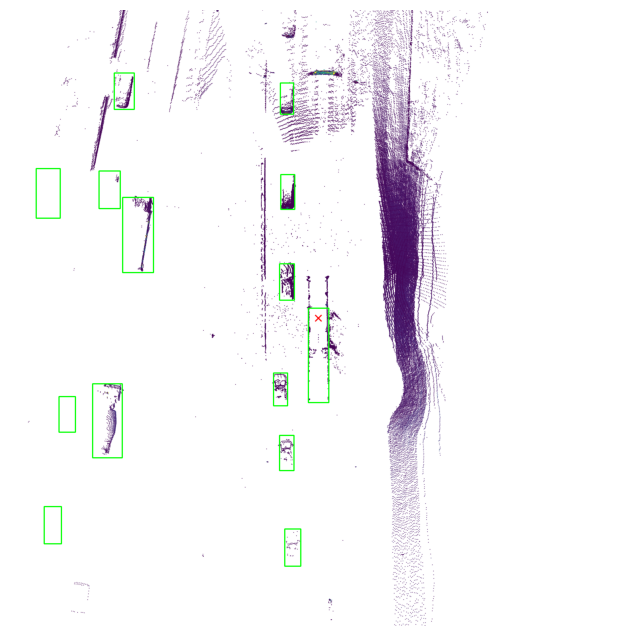

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_labels(image_path, label_path, class_names=None):
    # === PARAMETRI ===
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # === CARICA LABELS ===
    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue

        cls_id, x, y, box_w, box_h = map(float, parts)
        x_center = int(x * w)
        y_center = int(y * h)
        box_width = int(box_w * w)
        box_height = int(box_h * h)

        x1 = int(x_center - box_width / 2)
        y1 = int(y_center - box_height / 2)
        x2 = int(x_center + box_width / 2)
        y2 = int(y_center + box_height / 2)

        # Colore e testo
        color = (0, 255, 0)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

        if class_names:
            label = class_names[int(cls_id)]
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # === MOSTRA IMMAGINE ===
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

show_yolo_labels("/content/DATASET/images/train/0085b50c1d064bbba1c214e4d712d514_f.png", "/content/DATASET/labels/train/0085b50c1d064bbba1c214e4d712d514_f.txt")


Download Dataset

In [ ]:
import shutil
from google.colab import files
shutil.make_archive("DATASET", 'zip', "DATASET")
files.download("DATASET.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## YOLO traning

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

###1° Training

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(
    data="DATASET/dataset.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolo_bev_lidar"
)


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=DATASET/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_bev_lidar, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

train: Scanning /content/DATASET/labels/train... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 403.10it/s]

train: New cache created: /content/DATASET/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1709.2±1285.1 MB/s, size: 1438.1 KB)


val: Scanning /content/DATASET/labels/val... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 265.22it/s]

val: New cache created: /content/DATASET/labels/val.cache


Plotting labels to runs/detect/yolo_bev_lidar/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_bev_lidar
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.91G      4.249      5.078      2.788        964        640: 100%|██████████| 23/23 [00:22<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         40       2611     0.0125     0.0125    0.00912    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.97G      3.623      4.428       2.18        554        640: 100%|██████████| 23/23 [00:23<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         40       2611   0.000837     0.0375     0.0059    0.00285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         5G      3.384      3.683      1.904        757        640: 100%|██████████| 23/23 [00:20<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]


                   all         40       2611     0.0869      0.109     0.0885     0.0403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.6G      3.211      3.307      1.787        525        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


                   all         40       2611       0.56     0.0855      0.093     0.0528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.62G      3.137      3.205      1.714        781        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         40       2611      0.158      0.129      0.103     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.63G      3.028      3.076      1.676        621        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         40       2611        0.2     0.0982     0.0928     0.0616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.64G      2.952      3.008      1.647        561        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         40       2611       0.31     0.0838      0.105     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.67G      2.963      2.952      1.616        627        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40       2611      0.101      0.108       0.11     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.69G      2.835      2.777      1.574        831        640: 100%|██████████| 23/23 [00:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40       2611       0.15      0.114      0.107     0.0714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.7G      2.832      2.773      1.571        606        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         40       2611      0.325     0.0982      0.105     0.0689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.71G      2.766      2.728      1.555        703        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         40       2611      0.199      0.108      0.116     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.74G      2.767       2.68      1.532        589        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40       2611      0.313      0.101      0.123     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.75G      2.722      2.619      1.506        649        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         40       2611      0.373     0.0945      0.118     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.77G      2.677      2.613      1.516        466        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40       2611      0.307      0.116      0.136     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.78G      2.684      2.605      1.514        523        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         40       2611      0.375      0.109      0.141     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.81G      2.683      2.537      1.488        831        640: 100%|██████████| 23/23 [00:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40       2611      0.187      0.147      0.141     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.82G      2.617      2.533      1.487        444        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         40       2611      0.206      0.139      0.154      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.84G      2.575      2.496      1.474        506        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         40       2611      0.223      0.142      0.161      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.85G       2.62      2.469      1.469        829        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40       2611      0.198      0.153      0.158      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.87G      2.527      2.393       1.44        405        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40       2611      0.197      0.143      0.149      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.89G      2.548      2.421      1.455        648        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40       2611      0.189      0.144      0.156      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.91G      2.538      2.432      1.471        644        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         40       2611      0.136       0.14      0.143     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.92G       2.53      2.407      1.464        466        640: 100%|██████████| 23/23 [00:18<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40       2611      0.178      0.161      0.152      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.94G      2.509      2.352      1.444        692        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40       2611      0.184      0.167      0.167      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.96G      2.489      2.339       1.44        415        640: 100%|██████████| 23/23 [00:17<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         40       2611      0.233      0.154      0.162      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.98G      2.488       2.31      1.429        602        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         40       2611      0.169      0.158      0.165      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.99G      2.476      2.335      1.433        592        640: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40       2611       0.16       0.18       0.16       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.01G      2.455      2.281      1.423        493        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         40       2611        0.2      0.171      0.167       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.03G      2.472      2.329      1.432        432        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         40       2611      0.203      0.165      0.169      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.04G      2.434      2.291      1.425        498        640: 100%|██████████| 23/23 [00:17<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40       2611      0.171      0.186      0.172       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.05G      2.403      2.236        1.4        408        640: 100%|██████████| 23/23 [00:19<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         40       2611      0.173      0.179      0.169      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.08G        2.4      2.253      1.385        565        640: 100%|██████████| 23/23 [00:18<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         40       2611      0.241      0.165      0.167      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       6.1G       2.38      2.207      1.387        666        640: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         40       2611      0.232      0.155       0.17      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.11G      2.411      2.236      1.388        874        640: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         40       2611       0.21      0.166      0.175      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.12G      2.408      2.238      1.399        708        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         40       2611      0.206      0.176      0.172      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.15G      2.364      2.224      1.399        443        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         40       2611      0.156      0.182      0.167      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.16G      2.365      2.208      1.388        668        640: 100%|██████████| 23/23 [00:17<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         40       2611       0.17      0.176      0.169       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.18G      2.359      2.209      1.385        562        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         40       2611      0.223      0.178      0.176      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.19G      2.395      2.202      1.385        659        640: 100%|██████████| 23/23 [00:18<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         40       2611      0.191       0.17      0.173      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.21G      2.384      2.218      1.384        513        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         40       2611      0.204      0.175      0.173      0.131


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.23G      2.282      2.394      1.358        379        640: 100%|██████████| 23/23 [00:21<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         40       2611      0.195       0.18      0.178      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.25G      2.246      2.291      1.327        411        640: 100%|██████████| 23/23 [00:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         40       2611      0.188      0.175      0.171      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.26G       2.21      2.269      1.335        281        640: 100%|██████████| 23/23 [00:24<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         40       2611      0.189      0.186      0.177      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.28G      2.161      2.225      1.319        159        640: 100%|██████████| 23/23 [00:18<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         40       2611      0.197      0.184      0.176      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       6.3G       2.17      2.197      1.296        294        640: 100%|██████████| 23/23 [00:18<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         40       2611      0.216      0.176      0.174      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.32G      2.147      2.199      1.298        340        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         40       2611      0.186      0.182      0.175       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.33G      2.159      2.196       1.31        335        640: 100%|██████████| 23/23 [00:19<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         40       2611      0.186       0.18      0.176      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.35G      2.116      2.205      1.307        296        640: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         40       2611      0.189      0.186      0.178      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.37G       2.13      2.182      1.297        317        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         40       2611       0.19      0.182      0.178      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.38G      2.126      2.153      1.292        384        640: 100%|██████████| 23/23 [00:17<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         40       2611      0.196      0.182      0.177      0.137



50 epochs completed in 0.296 hours.
Optimizer stripped from runs/detect/yolo_bev_lidar/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolo_bev_lidar/weights/best.pt, 6.3MB

Validating runs/detect/yolo_bev_lidar/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,158 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


                   all         40       2611      0.194      0.182      0.177      0.137
human.pedestrian.adult         16         94          0          0          0          0
human.pedestrian.child          1          2          0          0          0          0
human.pedestrian.construction_worker          6          9          0          0          0          0
movable_object.barrier          6          6          0          0          0          0
movable_object.trafficcone         11        156          0          0          0          0
static_object.traffic_sign         37        565          0          0          0          0
       vehicle.bicycle         12         22          0          0          0          0
     vehicle.bus.rigid         12         44      0.341      0.364      0.387      0.195
           vehicle.car         40       1203      0.237      0.378        0.2     0.0943
  vehicle.construction         13         17          0          0          0          0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b174239db50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044

### 2° Pretraining + Finetuning

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

#  Pretraining
model = YOLO("yolov8s.pt")

model.train(
    data="DATASET/dataset.yaml",
    epochs=40,
    imgsz=1024,
    batch=8,
    lr0=0.001,
    warmup_epochs=3,
    weight_decay=0.0005,
    cos_lr=True,
    patience=10,
    name="bev_pretrain_s",
    degrees=0.0, flipud=0.0, fliplr=0.0, mosaic=0.0, mixup=0.0,
    freeze=0
)

#  Fine-tuning
model = YOLO("runs/detect/bev_pretrain_s/weights/best.pt")

model.train(
    data="DATASET/dataset.yaml",
    epochs=20,
    imgsz=1024,
    batch=8,
    lr0=1e-4,
    warmup_epochs=2,
    weight_decay=0.0005,
    name="bev_finetune_s",
    degrees=0.0, flipud=0.0, fliplr=0.0, mosaic=0.0, mixup=0.0

)



ValueError: module functions cannot set METH_CLASS or METH_STATIC

In [ ]:
import shutil
from google.colab import files
shutil.make_archive("runs", 'zip', "runs")
files.download("runs.zip")





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3° Pretrain + Finetuning + Agumentation

In [ ]:
from ultralytics import YOLO
# === STEP 1: Pretraining congelato ===
model = YOLO("yolov8m.pt")

model.train(
    data="DATASET/dataset.yaml",
    epochs=50,
    imgsz=1024,
    batch=8,  # <-- se la GPU lo regge
    lr0=0.001,
    warmup_epochs=3,
    weight_decay=0.0005,
    cos_lr=True,
    patience=10,
    freeze=10,
    name="bev_pretrain_m",
    degrees=0.0, flipud=0.0, fliplr=0.0, mosaic=0.0, mixup=0.0,
    label_smoothing=0.01
)

# === STEP 2: Fine-tuning completo ===
model = YOLO("runs/detect/bev_pretrain_m/weights/best.pt")

model.train(
    data="DATASET/dataset.yaml",
    epochs=40,
    imgsz=1024,
    batch=8,  # <-- mantieni uguale se possibile
    lr0=0.001,  # <-- prova 5e-4 o 1e-3 in base alla curva loss/mAP
    warmup_epochs=3,
    weight_decay=0.0005,
    name="bev_finetune_m",
    degrees=1.0, scale=0.05, shear=1.0,
    translate=0.05, mosaic=0.05, mixup=0.0,
    label_smoothing=0.01
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 295MB/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=DATASET/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=bev_pretrain_m, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ove

100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960,

100%|██████████| 5.35M/5.35M [00:00<00:00, 116MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2246.6±1515.8 MB/s, size: 788.8 KB)


train: Scanning /content/DATASET/labels/train... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:01<00:00, 649.48it/s]


train: New cache created: /content/DATASET/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 976.2±1293.2 MB/s, size: 567.9 KB)


val: Scanning /content/DATASET/labels/val... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 307.78it/s]

val: New cache created: /content/DATASET/labels/val.cache


Plotting labels to runs/detect/bev_pretrain_m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/bev_pretrain_m
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.81G      3.443      4.153      2.504        319       1024: 100%|██████████| 90/90 [00:56<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.75s/it]

                   all         80       4959      0.129      0.118      0.124     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.52G      2.813      3.049      2.001        324       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all         80       4959      0.417      0.114      0.131     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.56G      2.662      2.953      1.922        313       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all         80       4959      0.329       0.13     0.0889     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.61G      2.534      2.779      1.817        232       1024: 100%|██████████| 90/90 [00:55<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.37s/it]

                   all         80       4959       0.44      0.136      0.152      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.61G       2.44      2.687      1.761        395       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all         80       4959       0.42       0.14      0.163      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.61G      2.386      2.605      1.709        375       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all         80       4959       0.53      0.139      0.166      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.61G      2.325      2.547      1.689        459       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.02s/it]

                   all         80       4959      0.457      0.153       0.18      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.61G       2.29      2.476      1.674        575       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all         80       4959      0.366      0.183      0.178      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.61G      2.228      2.423      1.623        393       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]

                   all         80       4959      0.333      0.183      0.184      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.61G      2.174       2.37      1.609        276       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         80       4959      0.319       0.19      0.183      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.61G      2.146       2.35      1.595        394       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all         80       4959      0.259      0.196      0.198      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.66G      2.103       2.27      1.554        269       1024: 100%|██████████| 90/90 [00:53<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all         80       4959      0.341      0.201      0.194      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.66G       2.09      2.245      1.548        290       1024: 100%|██████████| 90/90 [00:54<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all         80       4959      0.313      0.193      0.202      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.66G      2.076      2.226      1.532        199       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all         80       4959      0.366      0.206      0.202      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.66G      2.056      2.183      1.522        178       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         80       4959      0.303      0.201      0.202      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.71G      1.993      2.117       1.49        276       1024: 100%|██████████| 90/90 [00:54<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all         80       4959      0.314      0.213       0.21       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.71G      1.959      2.089      1.466        418       1024: 100%|██████████| 90/90 [00:54<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all         80       4959      0.536        0.2      0.208       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.71G      1.949       2.05      1.453        314       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]

                   all         80       4959      0.255      0.219      0.209       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.71G      1.951      2.058       1.46        417       1024: 100%|██████████| 90/90 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all         80       4959      0.319      0.195       0.21      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.76G       1.93      2.009      1.436        274       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all         80       4959      0.379      0.209      0.211      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.76G      1.899      1.961      1.409        341       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all         80       4959      0.403      0.217      0.217       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.76G      1.883      1.961      1.409        183       1024: 100%|██████████| 90/90 [00:54<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all         80       4959      0.228      0.222      0.217      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.76G      1.851      1.946      1.408        246       1024: 100%|██████████| 90/90 [00:53<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all         80       4959      0.531      0.211      0.213       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.76G      1.834      1.904      1.384        239       1024: 100%|██████████| 90/90 [00:53<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all         80       4959      0.388      0.218      0.223      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.76G       1.82      1.883      1.385        354       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all         80       4959      0.304      0.216      0.213       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.76G      1.795      1.856      1.376        482       1024: 100%|██████████| 90/90 [00:54<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all         80       4959      0.571      0.209       0.22      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.76G      1.782      1.828       1.36        362       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all         80       4959      0.486      0.216      0.221      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.76G      1.775      1.811      1.361        319       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all         80       4959      0.328      0.218      0.221      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.76G      1.746      1.774       1.33        503       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all         80       4959      0.414      0.219      0.242      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.76G      1.745      1.749       1.33        334       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all         80       4959      0.396      0.228      0.231      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.76G      1.709      1.752      1.336        243       1024: 100%|██████████| 90/90 [00:54<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all         80       4959       0.35      0.225      0.229       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.79G       1.69      1.708      1.311        352       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all         80       4959       0.43      0.229      0.234       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.79G      1.681      1.703      1.314        334       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all         80       4959      0.464      0.232      0.233      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.79G      1.666      1.678      1.296        323       1024: 100%|██████████| 90/90 [00:53<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all         80       4959      0.412      0.228      0.234      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.79G      1.648      1.654      1.291        369       1024: 100%|██████████| 90/90 [00:54<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all         80       4959      0.504      0.232       0.23      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.79G      1.648      1.643      1.298        337       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all         80       4959      0.553      0.226      0.238      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.79G      1.627      1.636      1.282        242       1024: 100%|██████████| 90/90 [00:53<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all         80       4959      0.379      0.235      0.238      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.79G      1.635       1.63      1.285        396       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all         80       4959      0.599      0.237      0.236      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.79G       1.61       1.61      1.268        281       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all         80       4959      0.601      0.231      0.235      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.79G      1.604      1.593      1.263        406       1024: 100%|██████████| 90/90 [00:55<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         80       4959      0.435      0.232      0.235      0.186


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.79G      1.589      1.576      1.256        248       1024: 100%|██████████| 90/90 [00:57<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all         80       4959      0.599      0.233       0.24      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.81G      1.597      1.585       1.27        334       1024: 100%|██████████| 90/90 [00:53<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all         80       4959       0.52      0.232      0.238      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.86G      1.581      1.566      1.252        393       1024: 100%|██████████| 90/90 [00:53<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all         80       4959      0.595      0.238       0.24      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.86G       1.57      1.558      1.255        218       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all         80       4959      0.513      0.238      0.239      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.86G      1.564      1.547      1.246        300       1024: 100%|██████████| 90/90 [00:53<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all         80       4959      0.526      0.234      0.239      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.86G      1.567      1.547      1.249        378       1024: 100%|██████████| 90/90 [00:55<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all         80       4959      0.527      0.234      0.239      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.86G      1.564      1.539      1.244        333       1024: 100%|██████████| 90/90 [00:53<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all         80       4959      0.633       0.23      0.243      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.86G      1.554      1.519      1.231        355       1024: 100%|██████████| 90/90 [00:55<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all         80       4959      0.595      0.228      0.241      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.86G      1.553      1.539      1.242        489       1024: 100%|██████████| 90/90 [00:54<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all         80       4959      0.674      0.227      0.241      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.86G      1.554      1.528       1.24        294       1024: 100%|██████████| 90/90 [00:55<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all         80       4959      0.678      0.229       0.24      0.188



50 epochs completed in 0.840 hours.
Optimizer stripped from runs/detect/bev_pretrain_m/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/bev_pretrain_m/weights/best.pt, 52.1MB

Validating runs/detect/bev_pretrain_m/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,847,287 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.54s/it]


                   all         80       4959      0.513      0.238      0.239      0.189
                animal          1          1          0          0          0          0
      human.pedestrian         48        223      0.281     0.0179     0.0271    0.00853
movable_object.barrier         12         12          0          0          0          0
           trafficcone         20        258          1          0          0          0
static_object.traffic_sign         70       1062      0.357    0.00659     0.0316      0.015
       vehicle.bicycle         22         36          0          0          0          0
         vehicle.heavy         80        974      0.373      0.426      0.369      0.184
           vehicle.car         80       2238      0.326      0.273      0.237      0.114
  vehicle.construction         25         30      0.373      0.367      0.422      0.249
   vehicle.ego_trailer         71         71      0.987          1      0.995      0.921
    vehicle.motor

train: Scanning /content/DATASET/labels/train.cache... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 726.5±33.5 MB/s, size: 567.9 KB)


val: Scanning /content/DATASET/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/detect/bev_finetune_m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/bev_finetune_m
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      8.83G      2.338       2.74      1.729        386       1024: 100%|██████████| 90/90 [01:06<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]

                   all         80       4959       0.28      0.201      0.203      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      8.99G      2.064      2.356      1.564        312       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

                   all         80       4959      0.403      0.192      0.204      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      8.28G      2.042      2.294      1.552        529       1024: 100%|██████████| 90/90 [01:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all         80       4959      0.353      0.201      0.206      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      8.55G      1.997       2.25      1.528        408       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all         80       4959      0.391      0.206      0.205      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      8.13G      1.937      2.171      1.489        425       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all         80       4959      0.309      0.215      0.219      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      8.52G      1.904      2.117      1.474        310       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all         80       4959      0.347      0.238      0.224      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      8.44G      1.865      2.046      1.456        476       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all         80       4959      0.424      0.217      0.218       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      8.79G      1.827      2.012      1.426        487       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all         80       4959      0.615      0.236      0.231      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60       8.5G      1.792      1.947      1.413        401       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all         80       4959      0.361       0.24      0.237       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      8.78G      1.777      1.914        1.4        280       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all         80       4959      0.418      0.234      0.236      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      8.55G      1.721       1.85      1.376        509       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all         80       4959      0.577      0.241      0.241      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      8.74G       1.69      1.811      1.356        392       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all         80       4959      0.542      0.255      0.247      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      8.29G      1.679      1.772      1.346        456       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all         80       4959      0.501      0.275      0.258      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      8.53G      1.657      1.745      1.331        319       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all         80       4959      0.664      0.253      0.266      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      8.48G      1.633      1.701      1.324        302       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all         80       4959      0.563      0.278      0.269      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60       9.7G      1.612      1.677      1.309        247       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all         80       4959      0.498      0.279      0.278      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      8.45G      1.572      1.633      1.291        494       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all         80       4959      0.506      0.275      0.274        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      8.52G       1.57      1.597      1.284        344       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all         80       4959      0.356      0.303      0.274      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      8.49G       1.56      1.573      1.287        399       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all         80       4959      0.581      0.286      0.281      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      9.09G      1.538      1.547       1.27        374       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all         80       4959      0.747      0.256      0.286      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      9.09G      1.517      1.502      1.259        328       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all         80       4959      0.532      0.288      0.269      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60       8.2G      1.492      1.469      1.248        402       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         80       4959      0.651      0.299      0.299      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      8.84G       1.48      1.459      1.243        292       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all         80       4959      0.654      0.284      0.303      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      8.05G      1.447      1.405      1.227        338       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all         80       4959      0.579      0.278      0.291      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      9.18G      1.447      1.388      1.224        390       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         80       4959      0.566      0.283      0.298      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      8.82G       1.42       1.36      1.211        602       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         80       4959      0.451      0.319      0.306      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      8.97G      1.404      1.332      1.199        480       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all         80       4959      0.593      0.313      0.311      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      9.27G      1.398      1.315      1.196        419       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all         80       4959      0.591      0.299      0.302      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      8.09G      1.387      1.303      1.193        533       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all         80       4959      0.453      0.319      0.296       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      8.97G      1.362      1.268       1.18        375       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all         80       4959      0.435      0.338      0.299      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      8.87G      1.344      1.241      1.174        501       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all         80       4959      0.512      0.334      0.297      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60       8.5G       1.35      1.226      1.171        417       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all         80       4959      0.303       0.32      0.297      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      8.66G      1.324       1.21       1.16        421       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all         80       4959      0.501      0.312      0.303      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      8.82G      1.308      1.171      1.154        307       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         80       4959      0.315      0.337      0.316      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      8.56G      1.295      1.159      1.145        400       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all         80       4959      0.516      0.326      0.299      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      8.91G      1.281      1.132      1.135        438       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all         80       4959      0.383       0.34      0.299      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      8.59G      1.266      1.126      1.131        406       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all         80       4959      0.389      0.391      0.393      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      8.61G      1.241      1.099      1.121        384       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all         80       4959      0.418      0.333      0.305       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      8.81G      1.243      1.083      1.123        399       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all         80       4959      0.396       0.34      0.311      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      8.81G      1.227      1.062      1.112        558       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all         80       4959      0.447      0.341      0.306      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      8.82G      1.224      1.048      1.108        249       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all         80       4959      0.393      0.345      0.314      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      9.13G      1.215      1.035      1.107        444       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all         80       4959      0.502      0.351      0.321      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       8.7G        1.2       1.03      1.099        370       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all         80       4959      0.424      0.347      0.322      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      8.54G       1.19      1.015      1.096        300       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         80       4959      0.462      0.344      0.315      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      8.79G      1.174     0.9952      1.089        336       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all         80       4959      0.263      0.542      0.393      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      8.53G      1.166     0.9861      1.083        347       1024: 100%|██████████| 90/90 [01:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all         80       4959      0.448      0.335      0.327      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      9.01G       1.15     0.9564      1.079        518       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all         80       4959      0.479      0.342      0.313      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      8.45G      1.137     0.9515      1.074        408       1024: 100%|██████████| 90/90 [01:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all         80       4959      0.367      0.362       0.39      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      8.62G      1.135     0.9421       1.07        420       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         80       4959      0.373      0.385      0.368      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      8.46G      1.129     0.9275      1.068        357       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all         80       4959      0.514      0.336      0.372      0.254


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      8.26G      1.081      0.886      1.043        418       1024: 100%|██████████| 90/90 [01:07<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         80       4959      0.396      0.329      0.316      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      8.51G      1.073     0.8733      1.043        388       1024: 100%|██████████| 90/90 [01:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all         80       4959      0.419      0.353      0.332      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      8.53G      1.066     0.8615      1.037        431       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

                   all         80       4959       0.37      0.383      0.408      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      8.87G      1.048     0.8515      1.031        284       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all         80       4959      0.409      0.348      0.327      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60       8.8G       1.05     0.8458      1.031        314       1024: 100%|██████████| 90/90 [01:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all         80       4959      0.419      0.348      0.326      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      8.69G      1.037     0.8438      1.024        282       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all         80       4959      0.385      0.356      0.324      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      8.71G      1.024      0.827      1.019        294       1024: 100%|██████████| 90/90 [01:03<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all         80       4959      0.497      0.335      0.324      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      8.62G      1.024     0.8219       1.02        293       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all         80       4959      0.307       0.36      0.324      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      8.26G      1.017     0.8189      1.017        553       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all         80       4959      0.395       0.37      0.325      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      8.49G      1.007     0.8105      1.013        433       1024: 100%|██████████| 90/90 [01:03<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all         80       4959       0.39      0.369      0.326      0.246



60 epochs completed in 1.214 hours.
Optimizer stripped from runs/detect/bev_finetune_m/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/bev_finetune_m/weights/best.pt, 52.1MB

Validating runs/detect/bev_finetune_m/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,847,287 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


                   all         80       4959       0.37      0.384      0.408      0.258
                animal          1          1          1          0      0.995      0.199
      human.pedestrian         48        223      0.106      0.175     0.0799     0.0286
movable_object.barrier         12         12          0          0    0.00721    0.00207
           trafficcone         20        258      0.205       0.31       0.17     0.0677
static_object.traffic_sign         70       1062      0.114     0.0913     0.0621     0.0291
       vehicle.bicycle         22         36          0          0     0.0109    0.00449
         vehicle.heavy         80        974      0.381      0.726      0.611      0.369
           vehicle.car         80       2238      0.302      0.655      0.462      0.269
  vehicle.construction         25         30      0.534        0.7       0.73       0.53
   vehicle.ego_trailer         71         71          1          1      0.995      0.915
    vehicle.motor

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79aafcb79cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504



### Reduce Label

In [ ]:
import os

class_map = {
    0: 0,  # animal
    1: 1,  # human.pedestrian.adult → human.pedestrian
    2: 1,  # human.pedestrian.child → human.pedestrian
    3: 1,  # human.pedestrian.construction_worker → human.pedestrian
    4: 1,  # human.pedestrian.stroller → human.pedestrian
    5: 2,  # movable_object.barrier
    6: 3,  # movable_object.trafficcone → trafficcone
    7: 4,  # static_object.traffic_sign
    8: 5,  # vehicle.bicycle
    9: 6,  # vehicle.bus.rigid → vehicle.heavy
    10: 7, # vehicle.car
    11: 8, # vehicle.construction
    12: 9, # vehicle.ego_trailer
    13:10, # vehicle.motorcycle
    14:11, # vehicle.other
    15: 6, # vehicle.trailer → vehicle.heavy
    16:12, # vehicle.train
    17: 6, # vehicle.truck → vehicle.heavy
}

# === Cartelle
input_dir = "DATASET/labels/train"
output_dir = "DATASET/labels_reduced/train"
os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(input_dir):
    if file.endswith(".txt"):
        input_path = os.path.join(input_dir, file)
        output_path = os.path.join(output_dir, file)

        with open(input_path, "r") as fin, open(output_path, "w") as fout:
            for line in fin:
                parts = line.strip().split()
                old_id = int(parts[0])
                new_id = class_map.get(old_id)
                if new_id is not None:
                    parts[0] = str(new_id)
                    fout.write(" ".join(parts) + "\n")


## YOLO infernza

In [7]:
!pip install ultralytics


Downloand dataset and weights

In [2]:
# Installa gdown (se non lo hai già)
!pip install -U gdown

# Usa gdown per scaricare
!gdown "https://drive.google.com/uc?id=1y7Dk2nR0g2SFSlPO0JtcaDdfx6dS4HwV"
!gdown "https://drive.google.com/uc?id=1eBZLkrGRM3ixVrTVrZYwjLyOoYeH8COu"

!unzip -q DATASET_FINISHED.zip -d DATASET


Downloading...
From (original): https://drive.google.com/uc?id=1y7Dk2nR0g2SFSlPO0JtcaDdfx6dS4HwV
From (redirected): https://drive.google.com/uc?id=1y7Dk2nR0g2SFSlPO0JtcaDdfx6dS4HwV&confirm=t&uuid=5a321828-25e6-468e-8717-303891af01b0
To: /content/DATASET_FINISHED.zip
100% 740M/740M [00:08<00:00, 82.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1eBZLkrGRM3ixVrTVrZYwjLyOoYeH8COu
From (redirected): https://drive.google.com/uc?id=1eBZLkrGRM3ixVrTVrZYwjLyOoYeH8COu&confirm=t&uuid=93d1cc46-b808-4fce-9cb0-04246c45edb6
To: /content/best.pt
100% 52.1M/52.1M [00:01<00:00, 37.3MB/s]


Results from a yolo model

In [11]:
import torch
import sys

print(torch.__version__)
print(sys.version)


ValueError: module functions cannot set METH_CLASS or METH_STATIC

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8m")

# Valuta solo sul validation set specificato nel file YAML
metrics = model.val(data="DATASET/dataset.yaml", imgsz=1024, split='val')

# Stampa mAP@0.5 e mAP@0.5:0.95
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print("Precision:", metrics.results_dict['metrics/precision(B)'])
print("Recall:", metrics.results_dict['metrics/recall(B)'])


ValueError: module functions cannot set METH_CLASS or METH_STATIC

Results from my trained model

In [9]:
from ultralytics import YOLO

model = YOLO("best.pt")

# Valuta solo sul validation set specificato nel file YAML
metrics = model.val(data="DATASET/dataset.yaml", imgsz=1024, split='val', save=True)

# Stampa mAP@0.5 e mAP@0.5:0.95
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print("Precision:", metrics.results_dict['metrics/precision(B)'])
print("Recall:", metrics.results_dict['metrics/recall(B)'])


ValueError: module functions cannot set METH_CLASS or METH_STATIC

In [10]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path

# === Lista immagini ===
image_paths = [
    "/content/DATASET/images/val/0c69f9d5815d4907a8438044c04201ef.png",
    "/content/DATASET/images/train/2c8d8a964ecd48c3ace81f8fdf2050c9.png",
    "/content/DATASET/images/val/6e85e65d164646609515e2482f43f9e8.png"
]

# === Carica il modello ===
model = YOLO("best.pt")

for path in image_paths:
    print(f"\n🖼️ Immagine: {os.path.basename(path)}")

    # Inference: YOLO salverà automaticamente l'immagine con i box
    results = model.predict(source=path, conf=0.25, save=True, augment=False)

    # Recupera la directory dove è stata salvata l'immagine
    save_dir = Path(results[0].save_dir)
    saved_img_path = save_dir / os.path.basename(path).replace(".png", ".jpg")

    # Mostra immagine con i box disegnati da YOLO
    img = cv2.imread(str(saved_img_path))
    if img is None:
        print(f"Error with : {saved_img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Predition: {os.path.basename(path)}")
    plt.show()

    trucksc.render_sample(path.split("/")[-1].split(".")[0])


ValueError: module functions cannot set METH_CLASS or METH_STATIC